# Are You Turning Away Applicants Before They Enter the Door? 

Jesse Freitas

December 8th, 2020

DATA 512

## Abstract 

The way we use language can subtly communicate our biases and deter people from dialog or, in the case of hiring, apply to jobs. In this report, I look at the disparity in gendered language across several disciplines. Through both qualitative and quantitative analysis, I find a significant difference in masculine tone across disciplines and more masculine wording than feminine wording in several job categories including Engineering, Finance and Creative roles. The use of masculine language appears to be correlated to the gender disparity in some roles while the use of feminine language had no impact. While these findings are consistent with another study performed by the University of Waterloo, this analysis is performed on a much larger scale on a different dataset indicating this bias is not unique to a particular location. 

## Introduction 

Multiple studies have suggested that the language we use in hiring influences the audience we are trying to reach and in turn influences the individuals who are hired. The goal for this project is to reproduce research that suggests linguistic patterns have bias in online job postings. The scope is to determine if male/female dominated jobs container gender specific language that could deter applicants through both qualitative and quantitative analysis.  

## Related Work  

Hiring practices are part of what drives economic equity and gender equality. As such recruiters and hiring managers are gatekeepers with the opportunity to affect the people we work with. However, multiple people have been looking at a part of the pipeline which is often ignored: Both companies and individuals have looked at gendered language in job descriptions including [Textio](https://textio.com/blog/avoiding-harmful-language-in-hiring-content/34152146534) and [Jieyu Zhao](https://arxiv.org/abs/1707.09457) and the impact it may have on candidates before even applying. Textio builds products to identify writing that contains strong tone that may affect the audience job description authors are trying to reach out to. Jieyu is a Microsoft fellowship recipient who has published numerous papers on identifying gender bias in corpora and how to compensate when training models.  

[University of Waterloo and Duke](https://www.paycor.com/resource-center/gender-discrimination-in-job-descriptions) also conducted a study of ninety-six individuals who looked at 6 job postings where two were written using terms and phrases that were considered “more masculine” and two were written using “more feminine” terms. The remaining two were neutral in wording. Some examples of masculine language are terms like “headstrong,” “persistent,” and “dominate;” Feminine terms, according to the University of Waterloo, included terms that evoked “empathy” and “compassion.” The conclusion of the study was that women were more likely not to apply to positions that contained more masculine phrasing.  

## Research Questions  

Following the Waterloo study, I aim to reproduce the results that they found on a larger data set to determine if the results that they found are consistent with a broader set of job descriptions. I attempt to outline comparable questions that the Waterloo study asked. 

1. What are the most frequently used words that are used in job postings across job categories? Is there anything that sticks out or seems like it may not generalize about job postings outside these categories? Is there any inherent bias in the data among or inside any category?  

2. What is the distribution of masculine and feminine language among different job? How many are considered stereotypically masculine or feminine?  

3. Is there a difference in the mean number of masculine and feminine terms for jobs that are stereotypically more masculine and feminine respectively? 

## Data  

The dataset consists of 30,000 US job postings that were posted publicly through the website Indeed. The data was extracted by a web content scraping company called PromptCloud and licensed as Public Domain. It is included [here](./data.zip) in a compressed format. 

The data was collected from August 1st, 2019 through October 31st, 2019. Each job post contains an unstructured natural language column containing a job description, an unstructured job title, and the location of the position. The dataset is originally from a data repository [(link)](https://data.world/promptcloud/indeed-job-posting-dataset). This dataset was published publicly and the original data itself was available publicly on Indeed's website.  

Because the job title and job description are unstructured, they required additional processing to perform the experiment. The job titles were categorized into the following categories using a simple rule-based heuristic: 

- Engineering 
- Business (administrative roles) 
- Marketing 
- Retail & Sales 
- Finance 
- Real Estate 
- Medical 
- Creative 
- Leadership (managers, Vice Presidents, C-suite executives) 

The following code categorizes job titles and generates a histogram that visualizes the frequency in which these positions occurred. One third of the job titles did not fall into the categories using the rule-based heuristic, however there were enough samples for the categories to move forward with the experiment. 

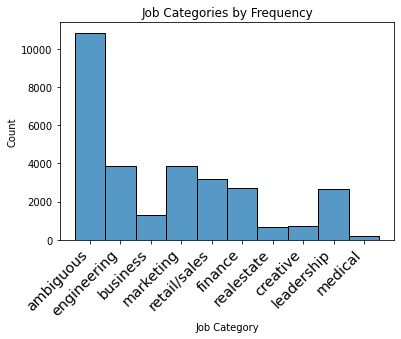

In [1]:
import pandas as pd
import numpy as np
import bs4 as bs
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# load postings
data = pd.read_csv('./data/data.csv')

# rule-based system for categorizing job posts
retail = data['job_title'].str.contains('sales.*associate|sales.*assistant|sales.*representative|sales engineer|sales.*agent|sales.*pro|sales consultant|sales special|sales rep|service.*representative|sales executive|support specialist|customer service|retail|part-time associate|full-time center associate|salesperson', flags=re.IGNORECASE, regex=True)
engineering = data['job_title'].str.contains('(?<!sales )engineer|data analyst|scientist|(?<!business )developer|product manager|program manager|technician|tech|chemist|solutions? architect|data architect|project manager', flags=re.IGNORECASE, regex=True)
marketing = data['job_title'].str.contains('marketing|Sales Development Representative|account rep|account manager|account executive|accounts manager', flags=re.IGNORECASE, regex=True)
finance = data['job_title'].str.contains('financ|teller|branch manager|tax preparer|tax manager|business developer|business development|business analyst|sales manager|analyst', flags=re.IGNORECASE, regex=True)
business = data['job_title'].str.contains('accounting|accounts payable|accounts receivable|recruit|human resource|executive assistant|concierge|administrative assistant|office manager|accountant|customer su|front|reception', flags=re.IGNORECASE, regex=True)
realestate = data['job_title'].str.contains('property manager|real estate|rental consultant|lease|leasing|mortgage', flags=re.IGNORECASE, regex=True)
creative = data['job_title'].str.contains('stylist|photo|designer|barber|beauty consultant|beauty specialist|beauty advisor', flags=re.IGNORECASE, regex=True)
medical = data['job_title'].str.contains('nurse|clinical|medical assistant|rn l|pharmacist|patient', flags=re.IGNORECASE, regex=True)
leadership = data['job_title'].str.contains('(?<!assistant to )vp|vice president|president|cfo|ceo|director|manager,', flags=re.IGNORECASE, regex=True)

# filter by rules
job_category = retail.copy()
job_category.loc[retail] = 'retail/sales'
job_category.loc[engineering] = 'engineering'
job_category.loc[marketing] = 'marketing'
job_category.loc[finance] = 'finance'
job_category.loc[business] = 'business'
job_category.loc[realestate] = 'realestate'
job_category.loc[creative] = 'creative'
job_category.loc[medical] = 'medical'
job_category.loc[leadership] = 'leadership'
# catch-all for job titles that don't fit the heuristic
job_category.loc[job_category == False] = 'ambiguous'

data['job_category'] = job_category
data.to_csv('./data/data_augmented2.csv')

# saving a copy to disk to reuse for later if needed
data = pd.read_csv('./data/data_augmented2.csv')

ax = sns.histplot(data['job_category'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('Job Categories by Frequency')
plt.xlabel('Job Category')
plt.show()

The job descriptions were parsed using an HTML parser and tokenized using `sklearn`’s tokenizer. When configuring the tokenizer, I used a list of stop words composed of the following: 

- [English stop words](https://www.ranks.nl/stopwords%22%20/) 
- Terms that appeared in less than 0.05% of job descriptions or more than 99.95% of job descriptions 
- Terms that appeared in job description headings (e.g. “Job Requirements”, “Essential Responsibilities”) 
- Numerical tokens that appeared in the corpus (e.g. Zip codes, job IDs, years) 

The stop words are in “./terms/stopwords.csv.” The result of this preprocessing is a matrix M by N where M is the number of job descriptions and N is the number of unique words that are in the corpus. 

In [2]:
import numpy as np
import math
import pandas as pd
import numpy as np
import bs4 as bs

# load terms
masc_terms = pd.read_csv('./terms/terms_m.csv', header=None)
fem_terms = pd.read_csv('./terms/terms_f.csv', header=None)

# load postings
data = pd.read_csv('./data/data_augmented2.csv')
stop_words = pd.read_csv('./terms/stopwords.csv', header=None)
j = len(data['job_description'])

# build the corpus from normalized job postings
# parse/remove HTML tokens
# make all tokens lowercase
corpus = []
sw = []
for word in stop_words[0].array:
    sw.append(word)

for i in range(j):
    jd = data['job_description'][i]
    jd_cleaned = bs.BeautifulSoup(jd, features="html.parser")
    jd_final = jd_cleaned.get_text().lower()
    corpus.append(jd_final)

from sklearn.feature_extraction.text import CountVectorizer

# tokenize job postings
# to compute tf-idf I ignored terms that showed up in less than 0.05% and 
# terms that showed up in more than 99.95% of job descriptions.
# I also built a stopwords list of terms using the following:
# - job description headers (e.g. "Essential Job Requirements:")
# - 10 most frequent terms in the Corpus Word Cloud
# - standard english stopwords from NLTK
# - numerical tokens that appeared in job postings more than 0.05% percent of the time (e.g. "95834")
# Complete list of stopwords is provided in `/data` directory
vectorizer = CountVectorizer(stop_words=frozenset(sw), min_df=0.0005, max_df=0.9995)
X = vectorizer.fit_transform(corpus)

# get mapping
mapping = vectorizer.get_feature_names()
masc_idx = []
fem_idx = []
for i in range(len(mapping)):
    for m in masc_terms[0]:
        if mapping[i].startswith(m):
            masc_idx.append(i)

    for f in fem_terms[0]:
        if mapping[i].startswith(f):
            fem_idx.append(i)

matrix = np.array(X.toarray())

# Get unique terms that appeared in at least one JD
features = np.array(vectorizer.get_feature_names())

Using this matrix of frequencies, I can compute several different metrics to help answer my research questions. 

## Methodology  

I constructed word clouds for each job category to see if there was a pattern or frequently used words and phrases that appeared across domains. Below is the code used to generate the word clouds in this report. 

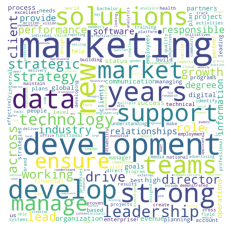

In [3]:
from wordcloud import WordCloud

# Compute total number of all term appearances across JDs (dim= # of unique words)
totalFrequencyPerTerm = matrix.sum(axis=0)
df = data

# Compute Frequency by Job Category for Word Clouds
businessFrequencyPerTerm = (matrix[df['job_category'] == 'business',:]).sum(axis=0)
creativeFrequencyPerTerm = (matrix[df['job_category'] == 'creative',:]).sum(axis=0)
engineeringFrequencyPerTerm = (matrix[df['job_category'] == 'engineering',:]).sum(axis=0)
retailFrequencyPerTerm = (matrix[df['job_category'] == 'retail/sales',:]).sum(axis=0)
marketingFrequencyPerTerm = (matrix[df['job_category'] == 'marketing',:]).sum(axis=0)
financeFrequencyPerTerm = (matrix[df['job_category'] == 'finance',:]).sum(axis=0)
leadershipFrequencyPerTerm = (matrix[df['job_category'] == 'leadership',:]).sum(axis=0)

# Builds a word cloud from unique terms and a parallel array of frequencies
def buildWordCloud(features, frequencies, filename):
    wcdict = {}
    for i in range(len(features)):
        wcdict[features[i]] = frequencies[i] 

    wc = WordCloud(stopwords=sw, width=1600, height=1600, background_color="white")
    ax = wc.generate_from_frequencies(wcdict)
    # show
    plt.imshow(wc, interpolation='antialiased')
    plt.axis("off")
    plt.savefig(filename)

buildWordCloud(features, totalFrequencyPerTerm, './totalWordCloud.png')
buildWordCloud(features, businessFrequencyPerTerm, './businessWordCloud.png')
buildWordCloud(features, creativeFrequencyPerTerm, './creativeWordCloud.png')
buildWordCloud(features, retailFrequencyPerTerm, './retailWordCloud.png')
buildWordCloud(features, engineeringFrequencyPerTerm, './engineeringWordCloud.png')
buildWordCloud(features, marketingFrequencyPerTerm, './marketingWordCloud.png')
buildWordCloud(features, financeFrequencyPerTerm, './financeWordCloud.png')
buildWordCloud(features, leadershipFrequencyPerTerm, './leadershipWordCloud.png')

To perform quantitative gender tone analysis, I used a set of terms that were defined by the University of Waterloo and Duke as traditionally masculine and feminine phrases, respectively. After preprocessing the text in the job descriptions, I computed if the mean number of traditionally masculine phrases is greater for more male dominant roles like finance, engineering, and leadership roles. To measure this, I used TF-IDF (Term Frequency Inverse Document Frequency) as a metric to measure the term frequency of masculine and feminine terms because it is normalized on the size of the corpus. 

In [4]:
# Compute total number of all term appearances per JD (dim= # number of unique JDs)
totalTermsPerJD = matrix.sum(axis=1)
# Compute total number of masculine term appearances per JD (dim= # number of unique JDs)
totalMascTermsPerJD = matrix[:,np.array(masc_idx)].sum(axis=1)
# Compute total number of feminine term appearances per JD (dim= # number of unique JDs)
totalFemTermsPerJD = matrix[:,np.array(fem_idx)].sum(axis=1)
# Compute total number of JDs that had at least one masculine term (type= numeric)
docMascFrequency = ((matrix[:,np.array(masc_idx)] != 0).sum(axis=1) != 0).sum()
# Compute total number of JDs that had at least one feminine term (type= numeric)
docFemFrequency = ((matrix[:,np.array(fem_idx)] != 0).sum(axis=1) != 0).sum()

# Compute TF/IDF for masculine and feminine terms.
masc = (totalMascTermsPerJD/totalTermsPerJD)/np.log(30002/(docMascFrequency))
fem = (totalFemTermsPerJD/totalTermsPerJD)/np.log(30002/(docFemFrequency))

# Compute JDs that are considered to use "masculine-dominant language" 
# (e.g. Were there more occurances of masculine terms than feminine terms?)
# use log transformation to reduce heteroskedasticity
male_dominant = np.log(1 + masc) > np.log(1 + fem)

# Supplement the dataframe with new columns
# use log transformation to reduce heteroskedasticity
data['masc'] = np.log(1 + masc)
data['fem'] = np.log(1 + fem)
data['male_dominant'] = male_dominant

Using the frequency generated for each job description, I was able to perform a couple of tests to determine if the mean frequency of masculine and feminine terms were different across job categories. Initially, I need to review assumptions to ensure validity so below I plot the frequency of masculine terms for the data set. 

Text(0.5, 1.0, 'Masculine Term Frequency in Indeed Job Posts')

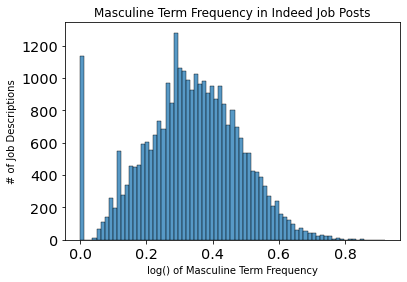

In [5]:
ax = sns.histplot(np.log(1 + data['masc']))
plt.xticks( 
    fontweight='light',
    fontsize='x-large'  
)
plt.yticks(
    fontweight='light',
    fontsize='x-large'
)
plt.ylabel('# of Job Descriptions')
plt.xlabel('log() of Masculine Term Frequency')
plt.title('Masculine Term Frequency in Indeed Job Posts')

I used a non-parametric test called the Kruskal test to determine if the means are different across job categories because there appears to be heteroskedasticity. The assumptions for the test are below: 

- Samples are random and independent. 
- The sample groups under analysis are independent. (In this case the sample group is based on job category, so this condition is met.) 
- The measurement is continuous. 
- There are no assumptions of the distribution (In this case, the histograms indicate a non-normal distribution.) 

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import gls
import scipy.stats as stats
import numpy as np

df = data
oneWayModel = stats.kruskal(df[df['job_category'] == 'retail/sales']['masc'], df[df['job_category'] == 'engineering']['masc'])

print(oneWayModel)

KruskalResult(statistic=60.23791992300962, pvalue=8.405712986509236e-15)


Because of the transformation and the results from the Kruskal test I am less concerned about heteroskedasticity affecting the results of my test, so I built a model using generalized linear regression. The assumptions for the ANOVA (Analysis of variance) test are below: 

- Samples must be normally distributed. (To compensate for heteroscedasticity, I applied a transformation to make the data more normal.) 
- Samples are random and independent. 
- The residuals must be normally distributed. 

The dependent variable is the frequency of masculine terms and the independent variables are the job category and an indicator variable for the presence of “male-dominant” language in a job description. This is computed using the frequency of masculine language and the frequency of feminine language where one indicates that there is more masculine language in the job description than feminine language and zero indicates otherwise.  

In [8]:
masc_model = gls('masc ~ C(job_category) + C(male_dominant) + C(job_category):C(male_dominant)', data=df).fit()
print(masc_model.summary())

                            GLS Regression Results                            
Dep. Variable:                   masc   R-squared:                       0.360
Model:                            GLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     886.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:26:24   Log-Likelihood:                 11349.
No. Observations:               30002   AIC:                        -2.266e+04
Df Residuals:                   29982   BIC:                        -2.249e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

## Findings 

In my qualitative look at language, I looked for terms that appeared in multiple job categories to see how their frequency differed. Below is a subset of word clouds for the Leadership, Engineering, and Creative roles respectively: 

![Leadership](./assets/leadershipWordCloud.png)
![Engineering](./assets/engineeringWordCloud.png)
![Leadership](./assets/creativeWordCloud.png)

Each discipline uses consistent language for specific aspects of its role. For example, leadership focuses on managing teams, driving growth in a capitalist economy (e.g. market, development, teams). Engineering focuses on technical skills, design, and building solutions, and creative roles are focused on beauty and design (the creative role likely is subject to bias towards cosmetic retail roles because of the limited sample size). A noticeable pattern can be seen in vocabulary across the disciplines. For example, “strong” appears to be more significant in Leadership and Engineering roles than the creative roles and is one of the terms classified as traditionally more masculine. People centric and empathetic language like “teams”, “people”, “care” and “passionate” are more commonly used in the Creative roles. 

The findings from my quantitative tests indicate that there is a significant difference in means of masculine language across job categories. The linear regression model indicates that masculine language is used more frequently in more male dominant job categories like finance, marketing, engineering, and leadership. The means for these categories are in the table below. This is also the case for feminine language; however, the test did not indicate that more frequent feminine language appeared in job categories that are more female-dominant. While the Waterloo study indicated that there was interaction between job category and male-dominant language in this analysis we did not see this was the case. When looking at job categories the only two categories where this was present were creative and finance roles. Engineering and Leadership were marginally significant. To validate the model, I have plotted the quantile-quantile plot of the residuals below the table of results to verify normality of the residuals. 

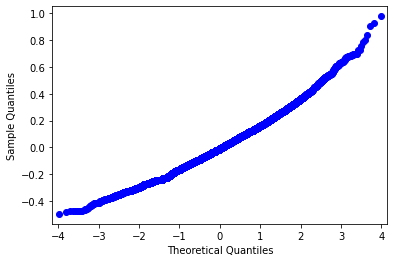

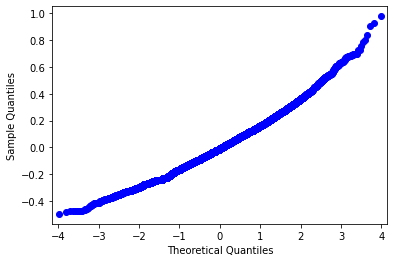

In [9]:
from IPython.display import HTML, display
import tabulate
table = [["", "Masculine", "Feminine"],
         ["Retail and Sales",np.mean(np.exp(df[df['job_category'] == 'retail/sales']['masc'])),np.mean(np.exp(df[df['job_category'] == 'retail/sales']['fem']))],
         ["Business",np.mean(np.exp(df[df['job_category'] == 'business']['masc'])),np.mean(np.exp(df[df['job_category'] == 'business']['fem']))],
         ["Creative",np.mean(np.exp(df[df['job_category'] == 'creative']['masc'])),np.mean(np.exp(df[df['job_category'] == 'creative']['fem']))],
         ["Marketing",np.mean(np.exp(df[df['job_category'] == 'marketing']['masc'])),np.mean(np.exp(df[df['job_category'] == 'marketing']['fem']))],
         ["Engineering",np.mean(np.exp(df[df['job_category'] == 'engineering']['masc'])),np.mean(np.exp(df[df['job_category'] == 'engineering']['fem']))],
         ["Finance",np.mean(np.exp(df[df['job_category'] == 'finance']['masc'])),np.mean(np.exp(df[df['job_category'] == 'finance']['fem']))],         
         ["Leadership",np.mean(np.exp(df[df['job_category'] == 'leadership']['masc'])),np.mean(np.exp(df[df['job_category'] == 'leadership']['fem']))]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

sm.qqplot(masc_model.resid)

The residuals plot illustrates that the error is relatively normally distributed.

## Discussion (Limitations and Implications) 

The study, while fruitful, is very limited because of a few factors. The first is that the process to label masculine and feminine language is naïve since it relies on a regular expression matching heuristic using stem words (e.g. “domina” maps to terms like “dominated,” “dominate,” “dominating”). Because there is no use of semantics (e.g. “Strong communication skills” vs “2+ years' experience strongly preferred”) my results could be influenced by semantic factors I was not aware of. The dataset was large but there were some potential biases in the way I categorized jobs and more robust labelling would have made for a cleaner experiment. Lastly, the list of terms I used was limited to a subset defined in the survey and I am sure there is more gendered language worth considering and the terms could be weighted based on their impact. 

I would have liked to perform a more robust quantitative analysis of the language used in the job descriptions compared to the population of employee demographics, but I did not have data do this, however my hypothesis is that there would be a correlation. 

Based on my results, it is likely that algorithms used to rank and recommend jobs are perpetuating bias. For example, if Indeed were to use a simple clustering algorithm on job descriptions to recommend jobs based on your search history, the jobs recommended could recommend jobs with similar linguistic properties, not just similar job types like engineering. For jobs that are male-dominant, this means that a female or non-binary candidate could be presented with overt masculine language that could deter them from applying to jobs lacking representation and perpetuate [Stereotype threat](https://www.apa.org/research/action/stereotype) and [imposter syndrome](https://www.apa.org/gradpsych/2013/11/fraud). 